<a href="https://colab.research.google.com/github/jeanmhuang/Data-Visualization/blob/main/stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance plotly matplotlib seaborn pandas


In [1]:
import plotly.express as px
import pandas as pd # Import pandas
import yfinance as yf

# Assuming 'stock_data' is a pandas DataFrame with 'Date' as index and 'AAPL', 'MSFT' as columns

# --- Start: Added code to create stock_data ---
# Download historical data for AAPL and MSFT
tickers = ["AAPL", "MSFT"]
start_date = "2020-01-01"
end_date = "2023-12-31"

# Download the full historical data and store it in full_stock_data
full_stock_data = yf.download(tickers, start=start_date, end=end_date)

# Create a separate DataFrame 'stock_data' specifically for the line plot,
# containing only the 'Close' price and reset the index
stock_data = full_stock_data['Close'].reset_index()

# Print the DataFrame info and columns after creation
print("\n--- Full Stock Data Info ---")
full_stock_data.info()
print("\n--- Full Stock Data Columns ---")
print(full_stock_data.columns)

print("\n--- Stock Data (for line plot) Info ---")
stock_data.info()
print("\n--- Stock Data (for line plot) Columns ---")
print(stock_data.columns)

# --- End: Added code to create stock_data ---


# Print the index name before melt for stock_data (which now has 'Date' as a column)
# The index is now a default integer index, so the name is None
print("\nIndex name before melt:", stock_data.index.name)
# Print the columns of the DataFrame before melt
print("Columns before melt:", stock_data.columns)


# Melt the DataFrame to long format
# 'Date' is now a column, so we can use it directly in id_vars
stock_data_melted = stock_data.melt(
    id_vars='Date',            # Columns to use as identifier variables
    value_vars=['AAPL', 'MSFT'], # Columns to unpivot
    var_name='Stock',          # Name for the new column holding the id_vars' names
    value_name='Price (USD)'   # Name for the new column holding the unpivoted values
)

# Create an interactive line plot using the melted DataFrame
fig = px.line(stock_data_melted,
              x='Date',  # Use the 'Date' column from the melted DataFrame
              y='Price (USD)', # Use the 'Price (USD)' column for values
              color='Stock',   # Use the 'Stock' column to differentiate lines
              title='Stock Price Over Time (Apple vs Microsoft)',
              labels={'Date': 'Date', 'Price (USD)': 'Price (USD)', 'Stock': 'Stock'}, # Update labels if needed
              markers=True)

# Show the plot
fig.show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed



--- Full Stock Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (Close, MSFT)   1006 non-null   float64
 2   (High, AAPL)    1006 non-null   float64
 3   (High, MSFT)    1006 non-null   float64
 4   (Low, AAPL)     1006 non-null   float64
 5   (Low, MSFT)     1006 non-null   float64
 6   (Open, AAPL)    1006 non-null   float64
 7   (Open, MSFT)    1006 non-null   float64
 8   (Volume, AAPL)  1006 non-null   int64  
 9   (Volume, MSFT)  1006 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 86.5 KB

--- Full Stock Data Columns ---
MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'

In [2]:
import plotly.graph_objects as go

# Create a candlestick chart for Apple using the full data
# Access the 'AAPL' multi-level column from the full_stock_data DataFrame
# The index is already the Date, so we use full_stock_data.index
fig_candlestick = go.Figure(data=[go.Candlestick(x=full_stock_data.index,
                                               open=full_stock_data['Open']['AAPL'], # Access 'Open' then 'AAPL'
                                               high=full_stock_data['High']['AAPL'], # Access 'High' then 'AAPL'
                                               low=full_stock_data['Low']['AAPL'],   # Access 'Low' then 'AAPL'
                                               close=full_stock_data['Close']['AAPL'], # Access 'Close' then 'AAPL'
                                               increasing_line_color='green',
                                               decreasing_line_color='red')])

# Customize the layout
fig_candlestick.update_layout(title='Apple Stock Candlestick Chart',
                              xaxis_title='Date',
                              yaxis_title='Price (USD)',
                              xaxis_rangeslider_visible=False)

# Show the candlestick plot
fig_candlestick.show()


'Adj Close' level not found. Using 'Close' for daily returns as a fallback.

--- Daily Returns Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1005 non-null   float64
 1   MSFT    1005 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB

--- Daily Returns Columns ---
Index(['AAPL', 'MSFT'], dtype='object', name='Ticker')


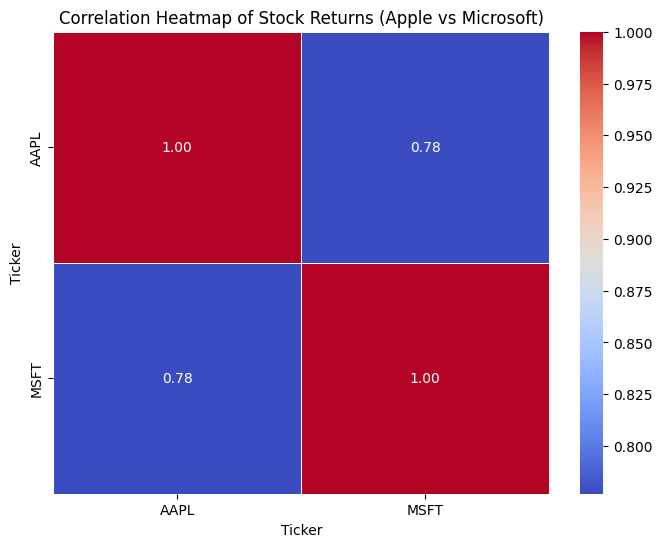

In [7]:
# Compute daily returns for the stocks using the 'Adj Close' from the full data
# Access the 'Adj Close' level from the full_stock_data DataFrame
# If yfinance downloads 'Adj Close', it will be a level in the MultiIndex columns

# Correctly access the desired price data across all tickers from the MultiIndex columns
# Use .xs() with level=0 and axis=1 to select the relevant metric level

# Check if 'Adj Close' is available at the top level of the columns
available_top_levels = full_stock_data.columns.get_level_values(0).unique()

if 'Adj Close' in available_top_levels:
    print("\n'Adj Close' level found. Using 'Adj Close' for daily returns.")
    # Access 'Adj Close' data using .xs()
    adj_close_data = full_stock_data.xs('Adj Close', level=0, axis=1)
elif 'Close' in available_top_levels:
    print("\n'Adj Close' level not found. Using 'Close' for daily returns as a fallback.")
    # Access 'Close' data using .xs() as a fallback
    adj_close_data = full_stock_data.xs('Close', level=0, axis=1)
else:
    # If neither 'Adj Close' nor 'Close' are available, raise an error
    print("\nNeither 'Adj Close' nor 'Close' levels were found in the data.")
    print("Available top-level column names (metrics):")
    print(available_top_levels)
    raise ValueError("Could not find 'Adj Close' or 'Close' price data to compute returns.")


# Compute daily returns from the adjusted close prices
# daily_returns will now be a DataFrame with Date as index and tickers as columns (price values)
daily_returns = adj_close_data.pct_change()

print("\n--- Daily Returns Info ---")
daily_returns.info()
print("\n--- Daily Returns Columns ---")
print(daily_returns.columns)


# Compute the correlation matrix
correlation_matrix = daily_returns.corr()

# Create a heatmap to visualize the correlation between stocks
# Assuming matplotlib and seaborn are imported earlier
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Returns (Apple vs Microsoft)')
plt.show()